# Carregando os pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregando os dados

In [2]:
dados2014 = pd.read_csv('rais-2014-states.csv', delimiter=',', decimal='.')
#dados2014 = dados2014[dados2014.columns[:len(dados2014.columns)//2]]
dados2013 = pd.read_csv('rais-2013-states.csv', delimiter=',', decimal='.')
dados2012 = pd.read_csv('rais-2012-states.csv', delimiter=',', decimal='.')
#dados_t = pd.concat([dados2014, dados2013, dados2012], axis=0, join='outer', ignore_index=True).dropna(axis=1).reset_index(drop=True)

# Dados duplicados?

In [3]:
duplicate_cols = ['Year.1', 'BRA ID.1', 'Total Monthly Wages.1',
       'Total Jobs.1', 'Total Establishments.1', 'Average Monthly Wage.1',
       'Average age.1', 'Industry Diversity.1',
       'Effective Industry Diversity.1', 'Occupation Diversity.1',
       'Effective Occupation Diversity.1', 'Nominal Wage Growth (1 year).1',
       'Nominal Wage Growth (5 year).1', 'Nominal Employee Growth (1 year).1',
       'Nominal Employee Growth (5 year).1', 'Gini coefficient.1']

for col in duplicate_cols:
    print(col, (dados2014[col[:-2]] == dados2014[col]).all())
    
dados2014.drop(duplicate_cols, axis=1, inplace=True)

Year.1 True
BRA ID.1 True
Total Monthly Wages.1 True
Total Jobs.1 True
Total Establishments.1 True
Average Monthly Wage.1 True
Average age.1 True
Industry Diversity.1 True
Effective Industry Diversity.1 True
Occupation Diversity.1 True
Effective Occupation Diversity.1 True
Nominal Wage Growth (1 year).1 True
Nominal Wage Growth (5 year).1 True
Nominal Employee Growth (1 year).1 True
Nominal Employee Growth (5 year).1 True
Gini coefficient.1 False


In [4]:
df = pd.concat([dados2012, dados2013, dados2014], axis=0, ignore_index=True)
df.head()

,Year,BRA ID,Total Monthly Wages,Total Jobs,Total Establishments,Average Monthly Wage,Average age,Industry Diversity,Effective Industry Diversity,Occupation Diversity,Effective Occupation Diversity,Nominal Wage Growth (1 year),Nominal Wage Growth (5 year),Nominal Employee Growth (1 year),Nominal Employee Growth (5 year),Gini coefficient
0,2012,1ac,2.411501e+08,125229,6593,1925.67,37.166,386,33.355,490,73.146,0.134,0.153,0.032,0.063,0.458
1,2012,1am,1.156788e+09,616377,19828,1876.75,36.175,550,75.359,573,97.572,0.122,0.131,0.028,0.049,0.454
2,2012,1ap,2.810227e+08,122956,5537,2285.56,36.765,360,32.812,477,56.526,0.145,0.160,0.037,0.068,0.475
3,2012,1pa,1.809379e+09,1052344,50730,1719.38,35.935,556,63.795,582,95.780,0.153,0.172,0.014,0.057,0.453
4,2012,1ro,6.461286e+08,365142,26026,1769.53,35.225,513,50.065,555,75.532,0.115,0.190,0.034,0.082,0.434


# Visualizando buracos

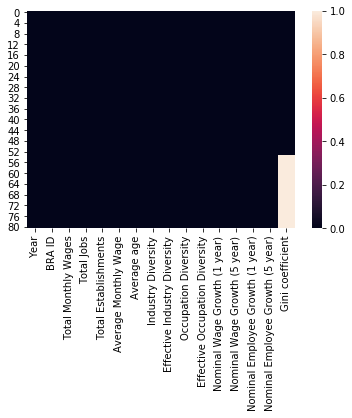

In [5]:
sns.heatmap(df.isna())

Claramente há falta do coeficiente de Gini para os dados (neste caso, 2014). Vou ignorá-los.

In [6]:
df.drop('Gini coefficient', axis=1, inplace=True)

In [7]:
df.dropna(inplace=True)

# Algumas informações do dataframe

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 15 columns):
Year                                81 non-null int64
BRA ID                              81 non-null object
Total Monthly Wages                 81 non-null float64
Total Jobs                          81 non-null int64
Total Establishments                81 non-null int64
Average Monthly Wage                81 non-null float64
Average age                         81 non-null float64
Industry Diversity                  81 non-null int64
Effective Industry Diversity        81 non-null float64
Occupation Diversity                81 non-null int64
Effective Occupation Diversity      81 non-null float64
Nominal Wage Growth (1 year)        81 non-null float64
Nominal Wage Growth (5 year)        81 non-null float64
Nominal Employee Growth (1 year)    81 non-null float64
Nominal Employee Growth (5 year)    81 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 9.6+ KB


In [18]:
df.columns

Index(['Year', 'BRA ID', 'Total Monthly Wages', 'Total Jobs',
       'Total Establishments', 'Average Monthly Wage', 'Average age',
       'Industry Diversity', 'Effective Industry Diversity',
       'Occupation Diversity', 'Effective Occupation Diversity',
       'Nominal Wage Growth (1 year)', 'Nominal Wage Growth (5 year)',
       'Nominal Employee Growth (1 year)', 'Nominal Employee Growth (5 year)'],
      dtype='object')

In [19]:
df.describe()

,Year,Total Monthly Wages,Total Jobs,Total Establishments,Average Monthly Wage,Average age,Industry Diversity,Effective Industry Diversity,Occupation Diversity,Effective Occupation Diversity,Nominal Wage Growth (1 year),Nominal Wage Growth (5 year),Nominal Employee Growth (1 year),Nominal Employee Growth (5 year)
count,81.000000,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2013.000000,3.746362e+09,1.802206e+06,125132.160494,1968.273704,36.445716,555.864198,85.231519,566.728395,93.050111,0.394938,0.110074,0.100012,0.037914
std,0.821584,6.334104e+09,2.722505e+06,184820.611033,461.049500,0.759564,89.081810,44.701583,35.195885,20.618090,0.386282,0.065775,0.100747,0.028978
min,2012.000000,1.855291e+08,9.215700e+04,4071.000000,1407.230000,34.786000,319.000000,19.557000,447.000000,51.731000,0.068000,0.016000,-0.013000,0.000000
25%,2012.000000,7.883491e+08,4.577300e+05,26269.000000,1704.400000,35.994000,515.000000,44.401000,558.000000,76.869000,0.121000,0.024000,0.028000,0.006000
50%,2013.000000,1.502250e+09,7.928680e+05,57078.000000,1883.190000,36.442000,560.000000,75.428000,580.000000,95.798000,0.145000,0.137000,0.040000,0.044000
75%,2014.000000,4.122719e+09,2.103002e+06,154839.000000,2067.080000,37.021000,637.000000,114.598000,590.000000,107.491000,0.837000,0.160000,0.198000,0.055000
max,2014.000000,3.568395e+10,1.411145e+07,924748.000000,4026.080000,38.125000,665.000000,183.089000,598.000000,125.464000,1.217000,0.239000,0.318000,0.153000


# Separando os Estados

In [22]:
def get_state(col):
    return col[1:].upper()
df['BRA ID'] = df['BRA ID'].apply(get_state)

# Análise

## Estados com maior número de empregos

In [218]:
df_por_trabalho = (
    df.groupby(['Year', 'BRA ID'])
    .max()
    .sort_values('Total Jobs', ascending=False)
    .sort_index(level='Year', sort_remaining=False)
)

heads = []
for year in df_por_trabalho.index.levels[0]:
    head = df_por_trabalho.xs(key = year).head(5).reset_index()
    head['Year'] = year
    heads.append(head)
    
maior_numero = pd.concat(heads, axis=0).set_index(['Year', 'BRA ID'])['Total Jobs']
maior_numero

Year  BRA ID
2012  SP        13783541
      MG         4928225
      RJ         4461706
      PR         3033665
      RS         2993031
2013  SP        14024340
      MG         5057080
      RJ         4586790
      PR         3121384
      RS         3082991
2014  SP        14111450
      MG         5071906
      RJ         4641380
      PR         3167134
      RS         3109179
Name: Total Jobs, dtype: int64

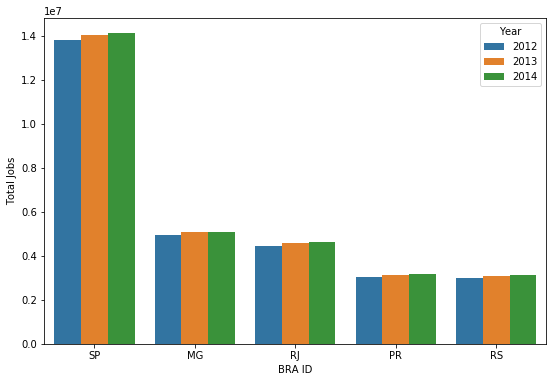

In [229]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'BRA ID', y = 'Total Jobs', hue = 'Year', data=maior_numero.reset_index())
plt.savefig('Maiores empregos por estado.png')

## Estados com maior número de estabelecimentos

In [224]:
df_por_trabalho = (
    df.groupby(['Year', 'BRA ID'])
    .max()
    .sort_values('Total Establishments', ascending=False)
    .sort_index(level='Year', sort_remaining=False)
)

heads = []
for year in df_por_trabalho.index.levels[0]:
    head = df_por_trabalho.xs(key = year).head(5).reset_index()
    head['Year'] = year
    heads.append(head)
    
maior_estab = pd.concat(heads, axis=0).set_index(['Year', 'BRA ID'])['Total Establishments']
maior_estab

Year  BRA ID
2012  SP        876427
      MG        420174
      RS        260956
      PR        257841
      RJ        251934
2013  SP        904104
      MG        434748
      RS        268702
      PR        267756
      RJ        258844
2014  SP        924748
      MG        445135
      PR        274201
      RS        272403
      RJ        263821
Name: Total Establishments, dtype: int64

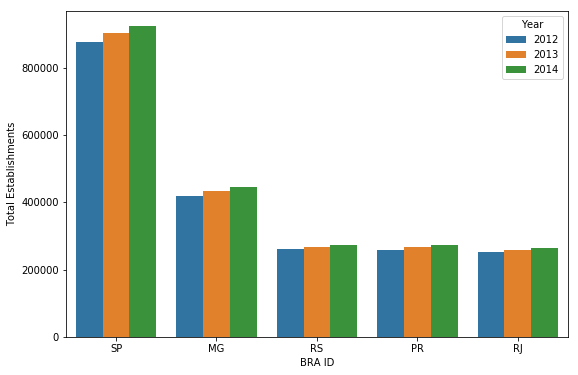

In [230]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'BRA ID', y = 'Total Establishments', hue = 'Year', data=maior_estab.reset_index())
plt.savefig('Número total de estabelecimentos por estado.png')

## Idade média por ano e estado

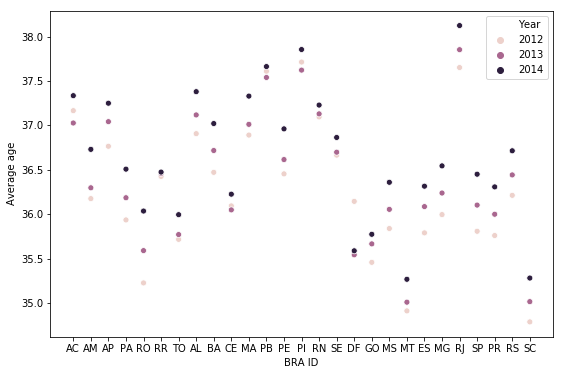

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.scatterplot(x = 'BRA ID', y = 'Average age', data=df, hue='Year', ax=ax)
plt.savefig('Idade média por ano e estado.png')

## Renda média

### 5 Melhores rendas médias por estado e ano

In [231]:
df_por_renda = (
    df.groupby(['Year', 'BRA ID'])
    .max()
    .sort_values('Average Monthly Wage', ascending=False)
    .sort_index(level='Year', sort_remaining=False)
)

heads = []
for year in df_por_renda.index.levels[0]:
    head = df_por_renda.xs(key = year).head(5).reset_index()
    head['Year'] = year
    heads.append(head)
    
maiores_rendas = pd.concat(heads, axis=0).set_index(['Year', 'BRA ID'])['Average Monthly Wage']
maiores_rendas

Year  BRA ID
2012  DF        3639.55
      AP        2285.56
      RJ        2208.13
      SP        2147.19
      RR        1978.41
2013  DF        3782.93
      AP        2479.98
      RJ        2467.39
      SP        2328.23
      RR        2185.86
2014  DF        4026.08
      AP        2739.37
      RJ        2674.85
      SP        2528.72
      RR        2391.64
Name: Average Monthly Wage, dtype: float64

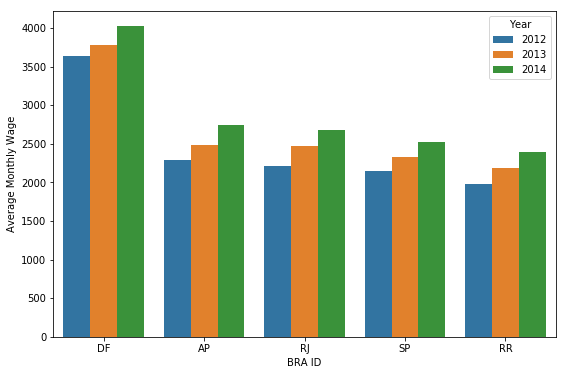

In [232]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'BRA ID', y = 'Average Monthly Wage', hue = 'Year', data=maiores_rendas.reset_index())
plt.savefig('Maiores rendas por estado.png')

### Renda média por ano

C:\Users\Karl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


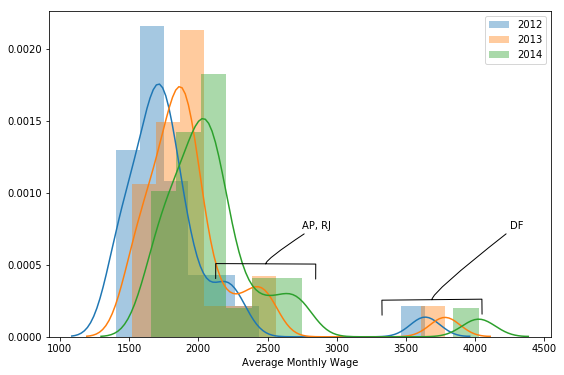

In [233]:
plt.figure(figsize=(9,6))
sns.distplot(df[df['Year'] == 2012]['Average Monthly Wage'], label=2012)
sns.distplot(df[df['Year'] == 2013]['Average Monthly Wage'], label=2013)
sns.distplot(df[df['Year'] == 2014]['Average Monthly Wage'], label=2014)
plt.legend()

ax = plt.gca()
ax.annotate(s = 'DF', xy = (3700, 0.00025), xytext = (4250, 0.00075), 
            arrowprops = dict(
                arrowstyle='-[, widthB=5.0, lengthB=1.5',
                connectionstyle='angle3, angleA=37.9')
           )
ax.annotate(s = 'AP, RJ', xy = (2500, 0.0005), xytext = (2750, 0.00075), 
            arrowprops = dict(
                arrowstyle='-[, widthB=5.0, lengthB=1.5',
                connectionstyle='angle3, angleA=32.93')
           )

plt.savefig('Salário médio mensal por ano.png')

## Correlação entre as propriedades

### Correlações completas

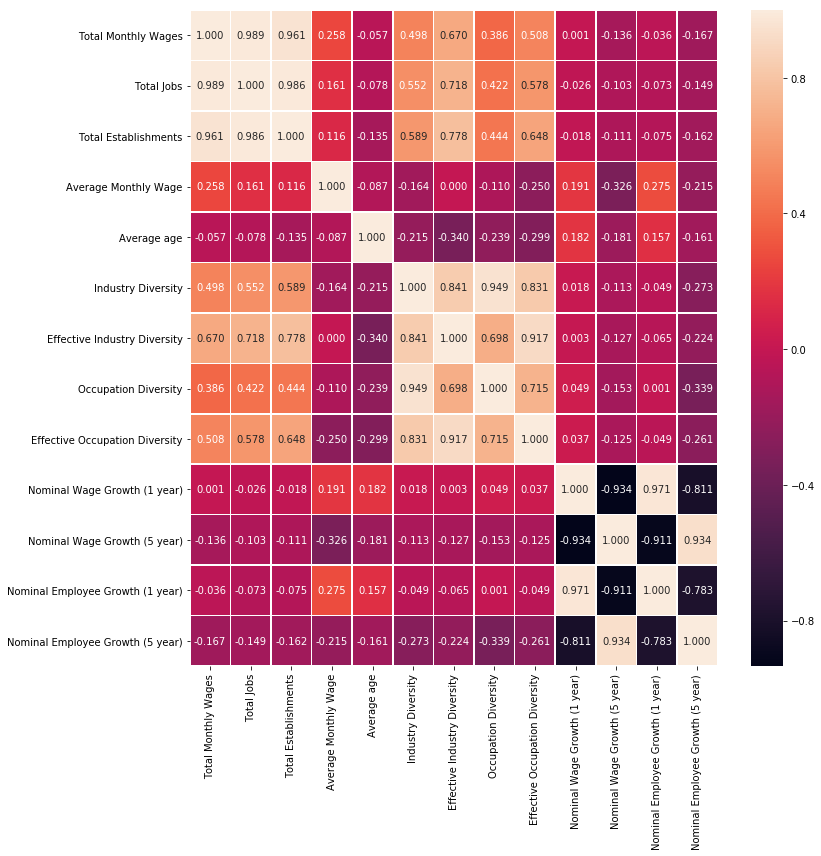

In [236]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop('Year', axis=1).corr(), annot=True, fmt='.3f', linewidths=.5)
plt.tight_layout()
plt.savefig('Mapa de correlações.png')

### Pairplot do segundo quadrante (Diversidade)

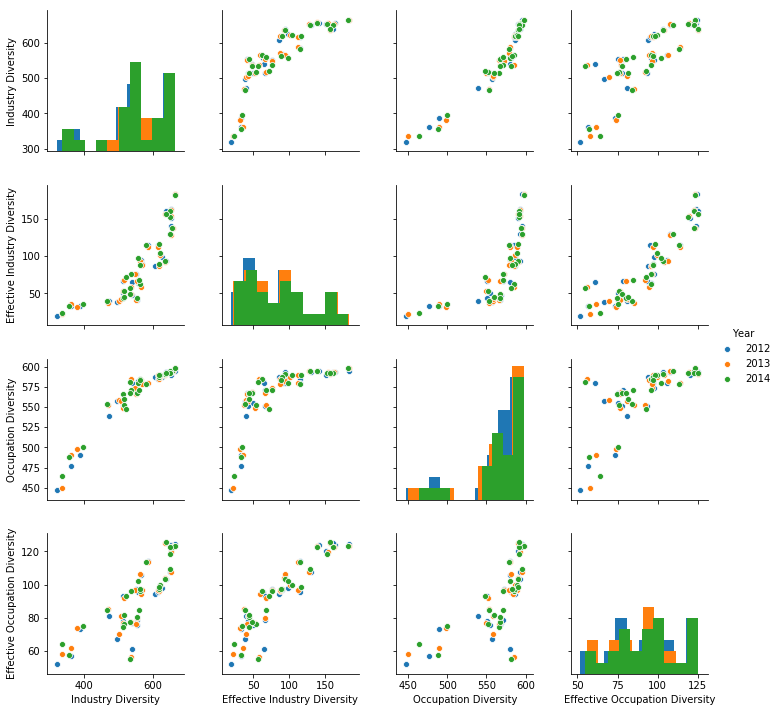

In [204]:
sns.pairplot(df, hue='Year', diag_kind='hist', 
             vars=['Industry Diversity', 'Effective Industry Diversity',
                   'Occupation Diversity', 'Effective Occupation Diversity',])

### Pairplot do terceiro quadrante (Crescimento)

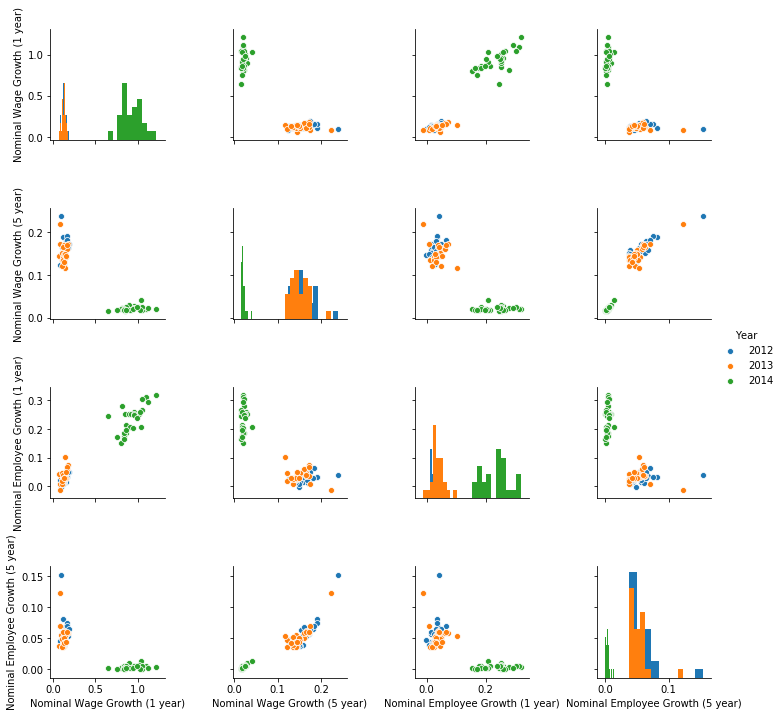

In [61]:
sns.pairplot(df, hue='Year', diag_kind='hist', 
             vars=['Nominal Wage Growth (1 year)', 'Nominal Wage Growth (5 year)',
                   'Nominal Employee Growth (1 year)', 'Nominal Employee Growth (5 year)'])

### Pairplot entre renda e crescimento

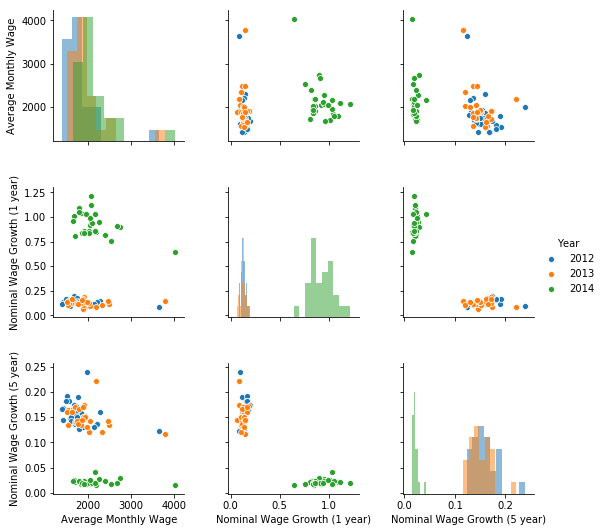

In [235]:
sns.pairplot(df, hue='Year', diag_kind='hist', 
             vars=['Average Monthly Wage', 'Nominal Wage Growth (1 year)', 'Nominal Wage Growth (5 year)'],
            diag_kws=dict(alpha=0.5))

plt.savefig('Relação entre renda e crescimento.png')

### Pairplot completo

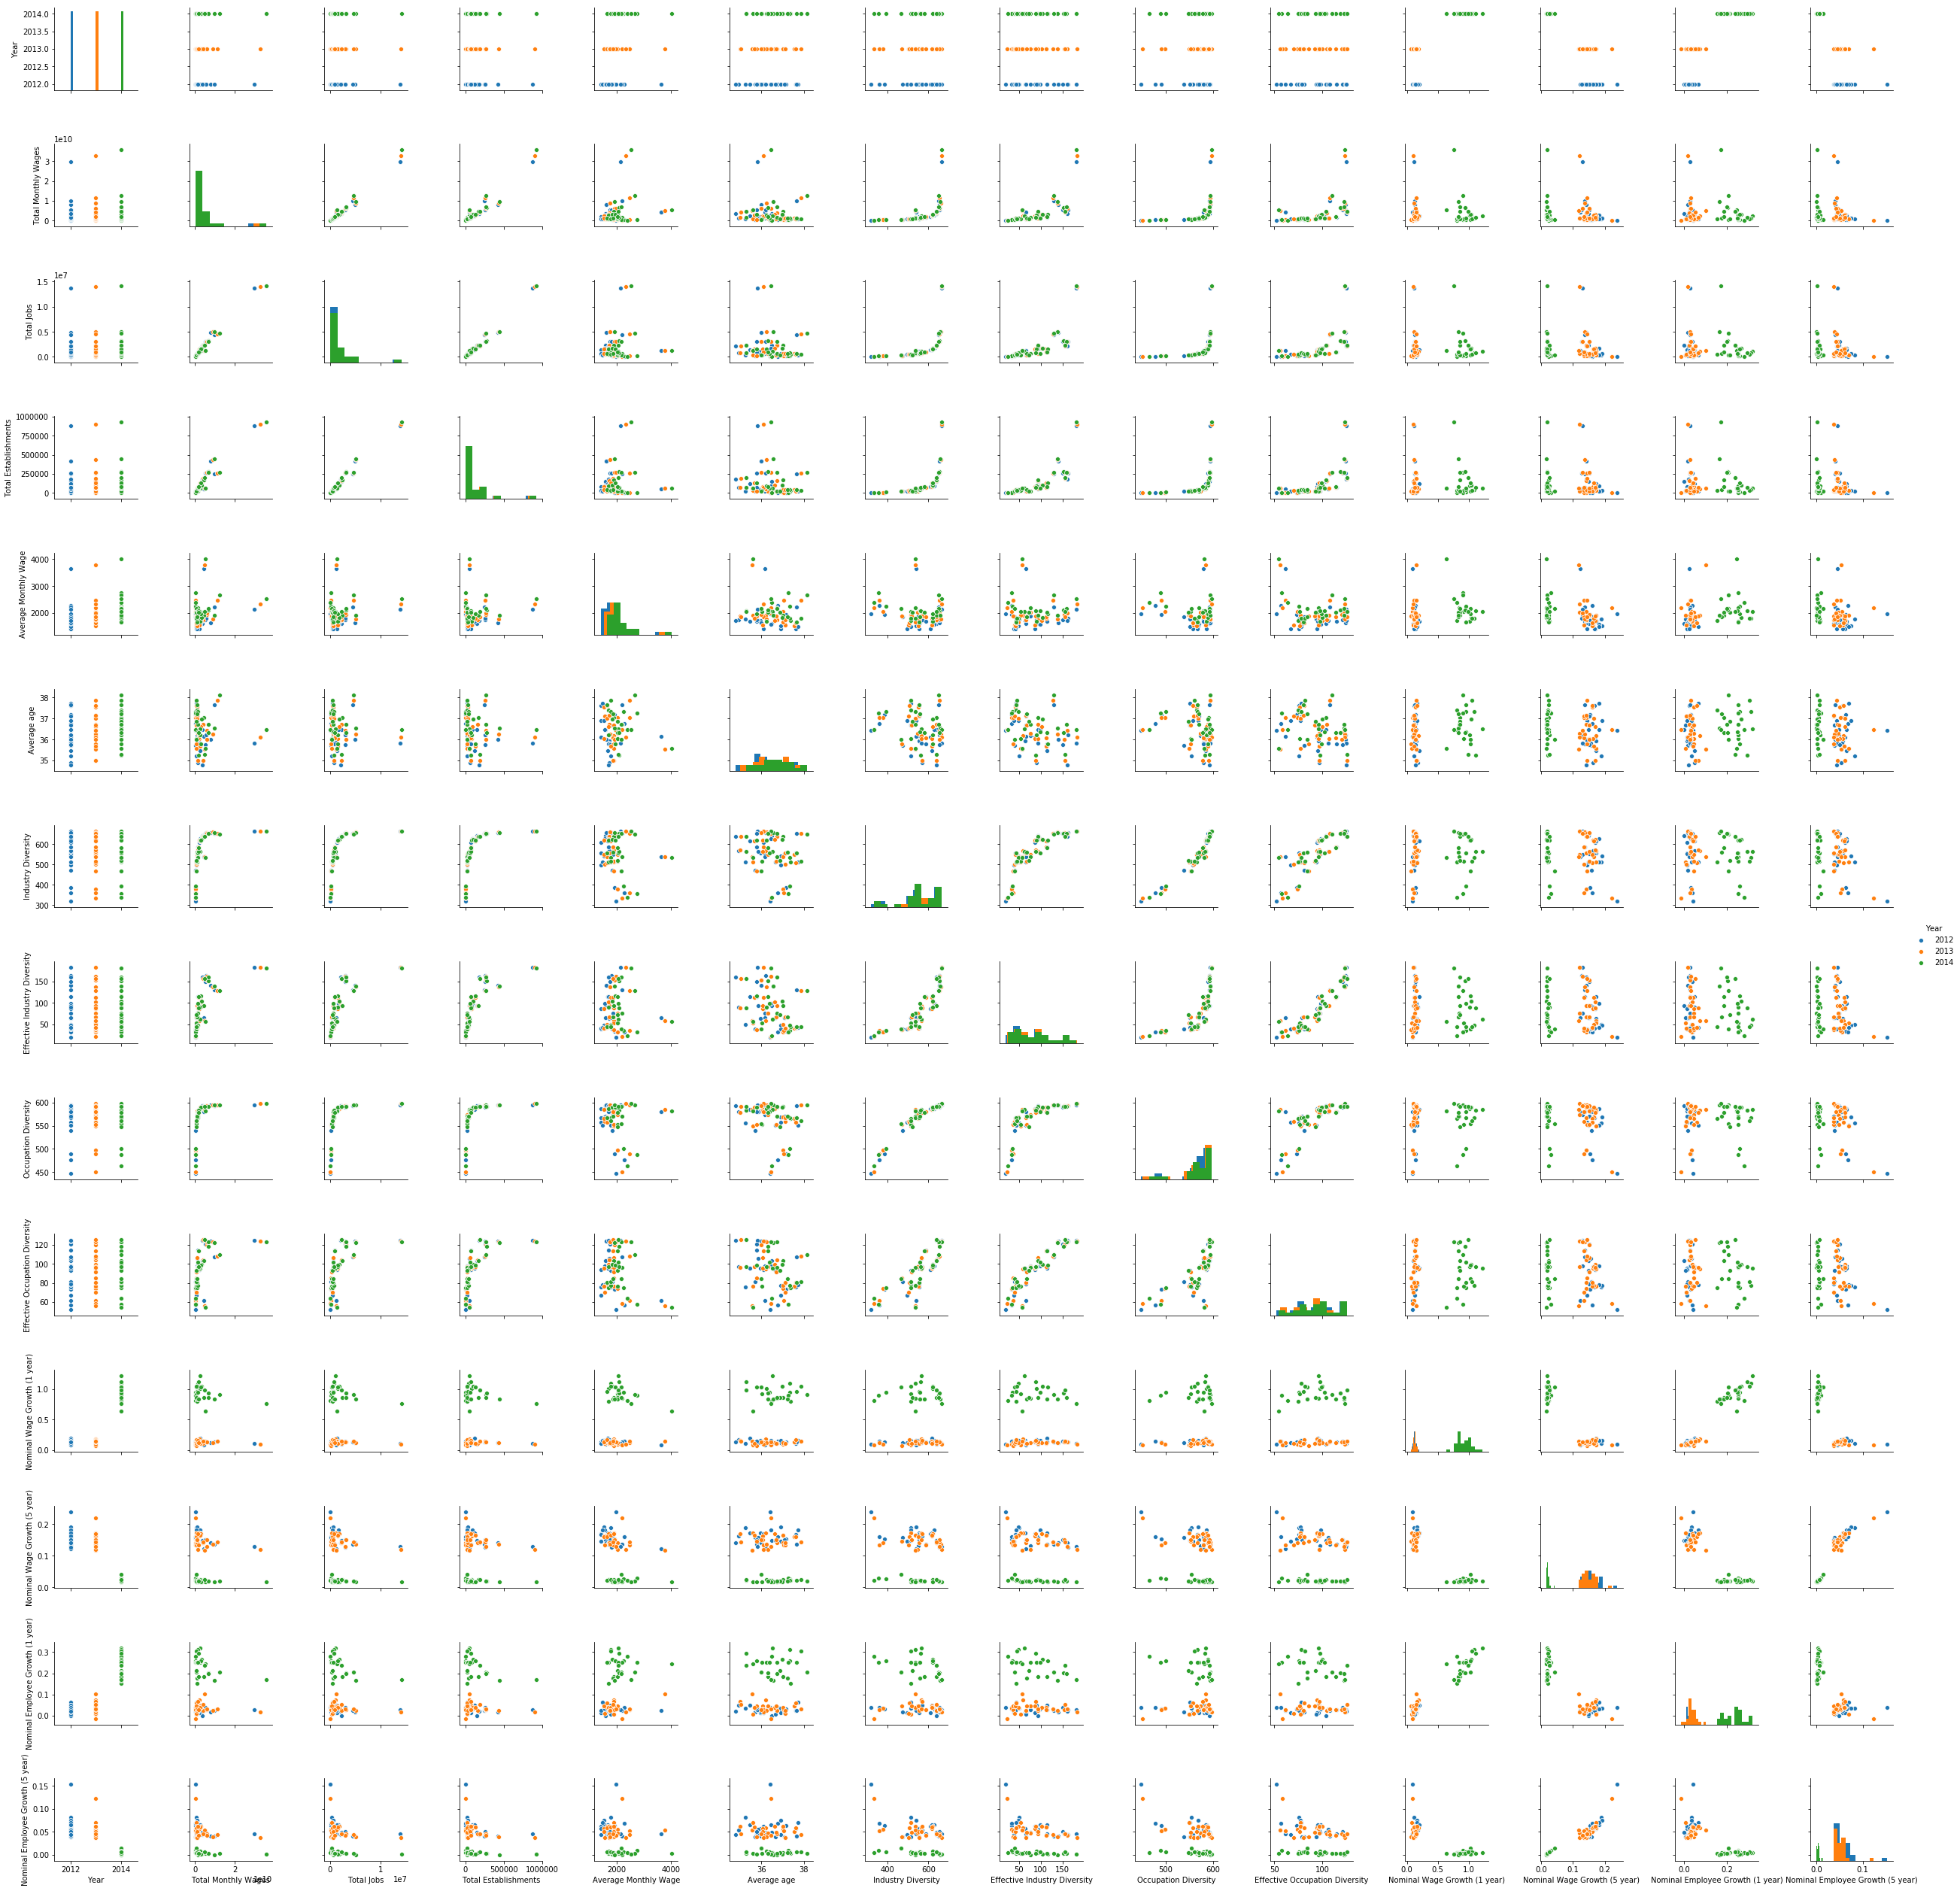

In [53]:
sns.pairplot(df, hue='Year', diag_kind='hist')